In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#解决中文显示问题
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [24]:
df = pd.read_csv('mask.csv',encoding='gb18030')
df

,名称,价格,月销量,评价数,店铺所在地,适合肤质,产地,补水保湿,美白提亮,控油祛痘,清洁毛孔,提拉紧致
0,ANGLEE,254.0,40,3133,湖南,任何肤质,中国,1,1,0,0,0
1,ANGLEE,350.0,62,876,浙江,任何肤质,中国,1,1,0,0,0
2,ANGLEE,284.9,12,16,浙江,任何肤质,中国,1,0,1,1,0
3,BF,289.0,32,175,英国,任何肤质,中国,1,0,0,0,0
4,BSR,379.9,1407,13870,安徽,任何肤质,中国,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
789,自然堂,122.0,1077,1715,上海,任何肤质,中国,1,1,0,0,0
790,自然堂,112.5,232,1887,上海,任何肤质,中国,1,0,0,1,0
791,自然堂,29.0,282,297,上海,任何肤质,中国,1,1,1,1,1
792,自然堂,173.0,1002,2389,浙江,任何肤质,中国,1,1,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 12 columns):
名称       794 non-null object
价格       794 non-null float64
月销量      794 non-null int64
评价数      794 non-null int64
店铺所在地    794 non-null object
适合肤质     794 non-null object
产地       794 non-null object
补水保湿     794 non-null int64
美白提亮     794 non-null int64
控油祛痘     794 non-null int64
清洁毛孔     794 non-null int64
提拉紧致     794 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 74.6+ KB


In [26]:
print(df['产地'].unique())
print(df['店铺所在地'].unique())
print(df['适合肤质'].unique())

['中国' '日本' '韩国' '美国' '英国' '其他/other']
['湖南' '浙江' '英国' '安徽' '广东' '湖北' '江苏' '上海' '江西' '北京' '海外' '天津' '山东' '河南'
 '新加坡' '河北' '辽宁' '四川' '重庆' '福建' '内蒙古' '海南' '云南' '广西' '陕西' '黑龙江']
['任何肤质' '干性肤质' '油性及混合性肤质' '中性及干性肤质' '混合型肤质' '敏感性肤质' '中性肤质' '油性肤质']


In [27]:
df.loc[df['店铺所在地'] == '英国','店铺所在地']= '海外'
df.loc[df['店铺所在地'] == '新加坡','店铺所在地'] = '海外'
df.loc[df['产地'] == '其他/other','产地'] = '其他'
df.loc[df['适合肤质'] != '任何肤质','适合肤质'] = '其他'

Text(0.5, 0, 'Blues')

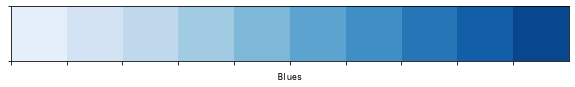

In [28]:
sns.palplot(sns.color_palette("Blues", 10))
plt.xlabel('Blues')

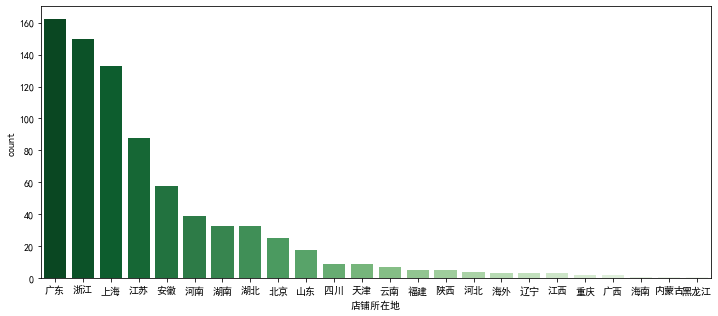

In [29]:
plt.figure(figsize=(12,5))
sns.countplot('店铺所在地',data=df,order = df['店铺所在地'].value_counts().index,palette='Greens_r')

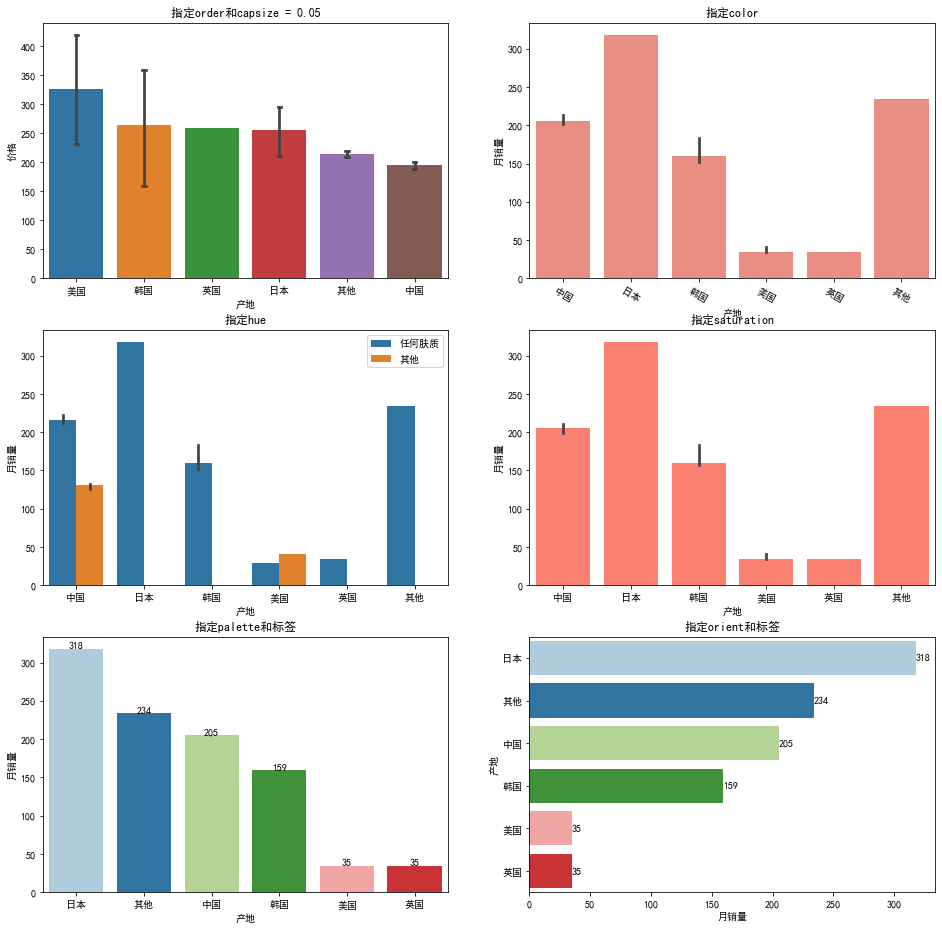

In [31]:
from numpy import median
mask = df

fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(3,2,1)
sns.barplot(x="产地", y="价格",data=mask, estimator=mean,ci=75,order=['美国', '韩国','英国','日本', '其他','中国'],capsize = 0.05) 
plt.title('指定order和capsize = 0.05')

ax=fig.add_subplot(3,2,2)
sns.barplot(x="产地", y="月销量", data=mask, estimator=median,ci=20,color="salmon")
plt.xticks(rotation=-30) #旋转标签
plt.title('指定color')

ax=fig.add_subplot(3,2,3)
sns.barplot(x="产地", y="月销量",hue="适合肤质", data=mask, estimator=median,ci=20)
plt.title('指定hue')
plt.legend(loc='upper right')

ax=fig.add_subplot(3,2,4)
sns.barplot(x="产地", y="月销量", data=mask, estimator=median,ci=20,color="salmon",saturation=1.2)
plt.title('指定saturation')

ax=fig.add_subplot(3,2,5)
bardata = mask[['产地','月销量']].groupby(['产地']).median().sort_values(by='月销量',ascending = False).reset_index()
g = sns.barplot(x="产地", y="月销量",data=bardata, palette="Paired")
for index,row in bardata.iterrows():
    g.text(row.name,row.月销量,int(row.月销量),color="black",ha="center") #ha调整位置
plt.title('指定palette和标签')

ax=fig.add_subplot(3,2,6)
g = sns.barplot(x="月销量", y="产地",data=bardata, palette="Paired",orient = "h")
for index,row in bardata.iterrows():
    g.text(row.月销量,row.name,int(row.月销量),color="black",va="center") #va调整位置
plt.title('指定orient和标签')##注意改变x和y

#plt.savefig('bar.png',dpi=500)
plt.show()

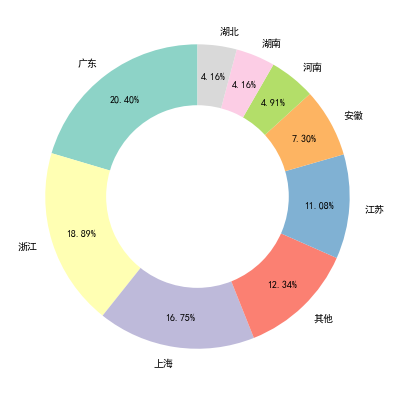

In [36]:
#环形图
plt.figure(figsize=(7,7))
mask['店铺所在地'].value_counts().plot.pie(autopct = '%1.2f%%',startangle=90,pctdistance=0.8,colors=sns.color_palette("Set3", 10))   
plt.pie([1],radius=0.6,colors='w') #内部白色饼图
plt.ylabel('')
plt.show()

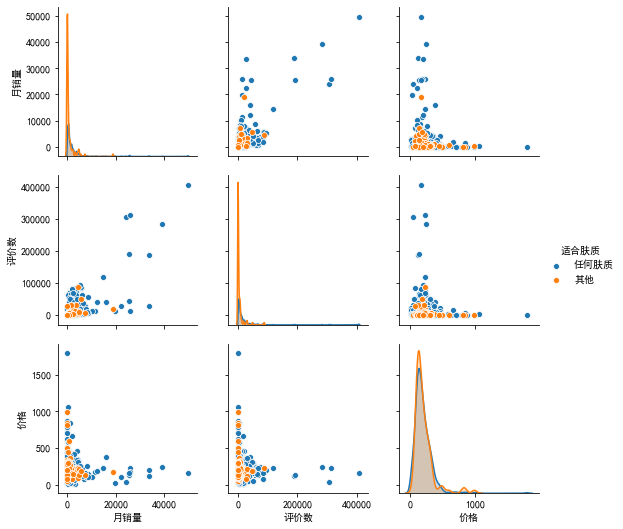

In [37]:
sns.pairplot(mask[['月销量','评价数','价格','适合肤质']],hue='适合肤质')

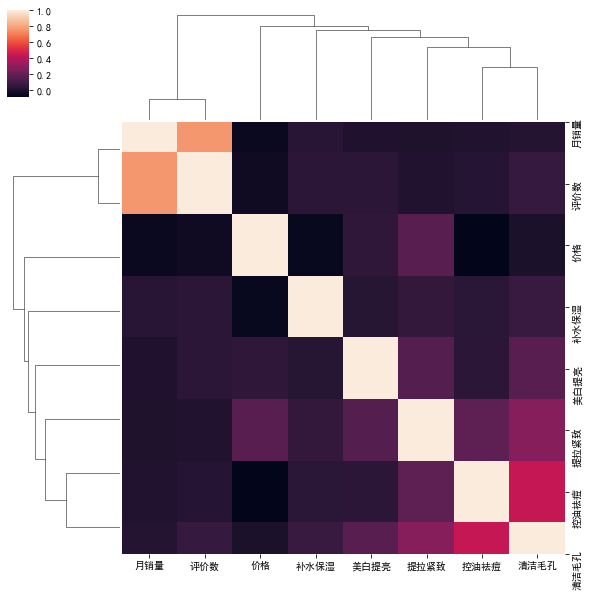

In [39]:
# 分层相关性热力图
sns.clustermap(mask[[col for col in mask if mask[col].dtype!='object']].corr())

店铺所在地


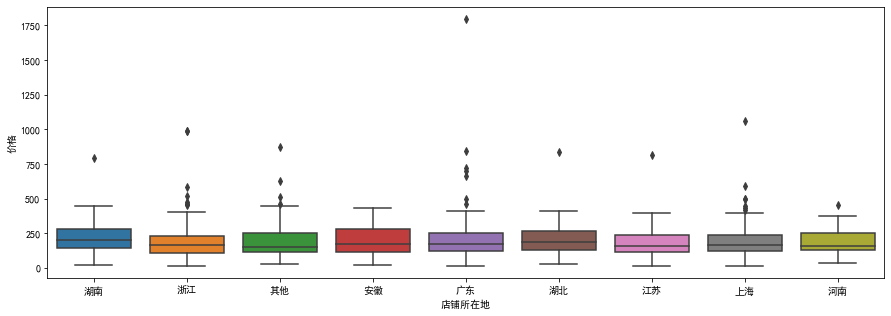

适合肤质


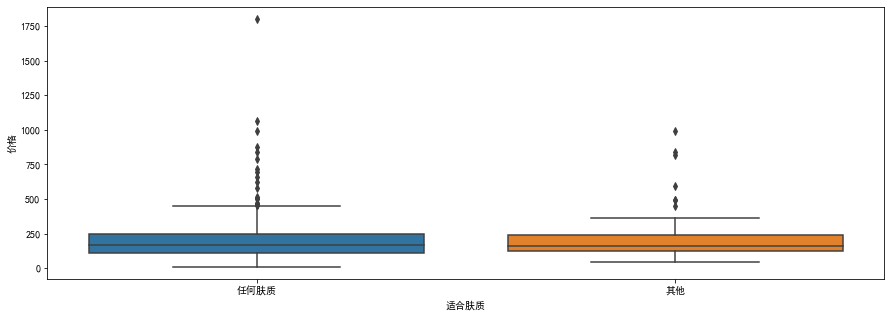

产地


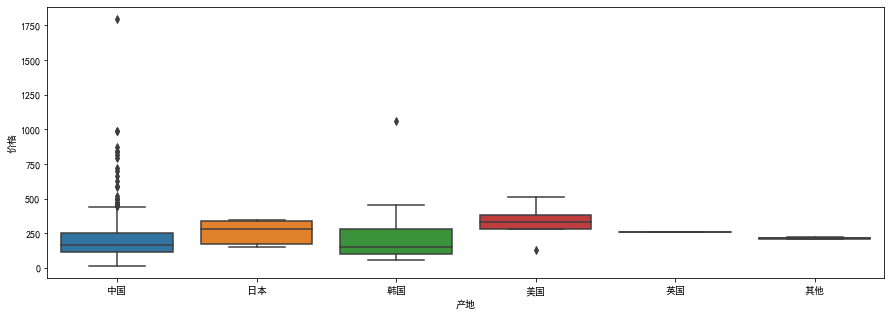

In [45]:
for col in [col for col in mask if mask[col].dtype=='object' and col!='名称']:
    print(col)
    plt.figure(figsize=(15,5))
    sns.boxplot(x=col, y="价格", data=df)
    plt.show()

店铺所在地


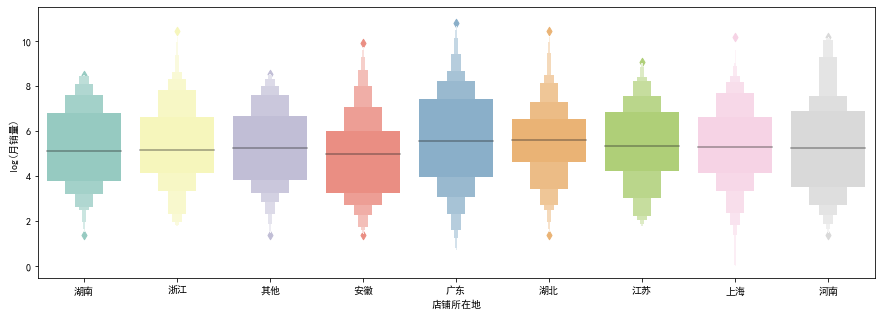

适合肤质


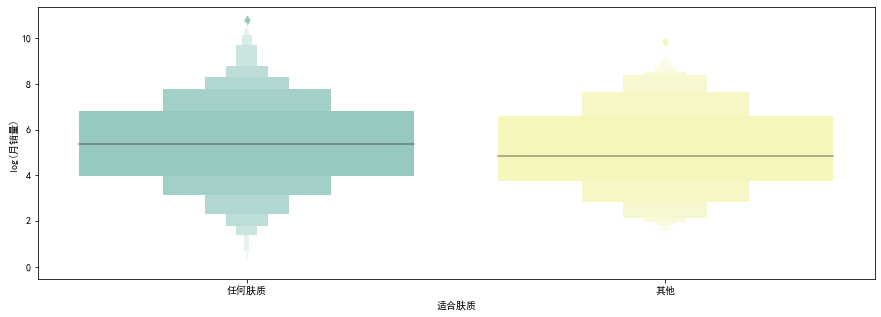

产地


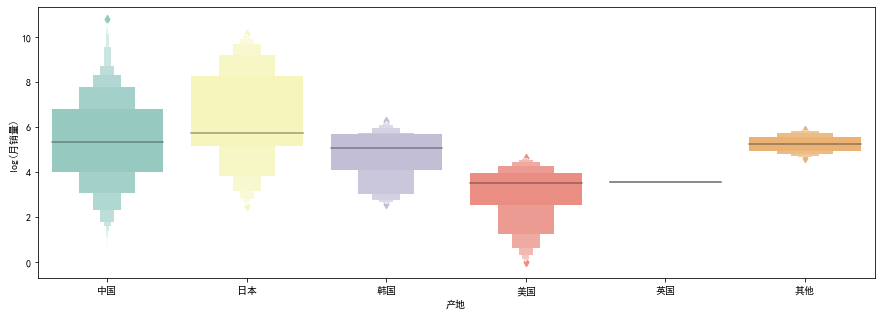

In [49]:
for col in [col for col in mask if mask[col].dtype=='object' and col!='名称']:
    print(col)
    plt.figure(figsize=(15,5))
    sns.boxenplot(x=col,y=log(mask['月销量']),data=mask,palette="Set3")
    plt.ylabel('log(月销量)')
    plt.show()